In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_ROBOFLOW_API_KEY")
project = rf.workspace("augmentationtrashnet").project("augtrashnet")
version = project.version(4)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AugTrashNet-4 in yolov11:: 100%|██████████| 75428/75428 [00:15<00:00, 4745.97it/s] 


# **Installation des dépendances**

In [2]:
!pip install ultralytics opencv-python matplotlib scikit-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Image exposure detected: overexposed
Detected exposure: overexposed - Applying Recursive RS-ESIHE correction.


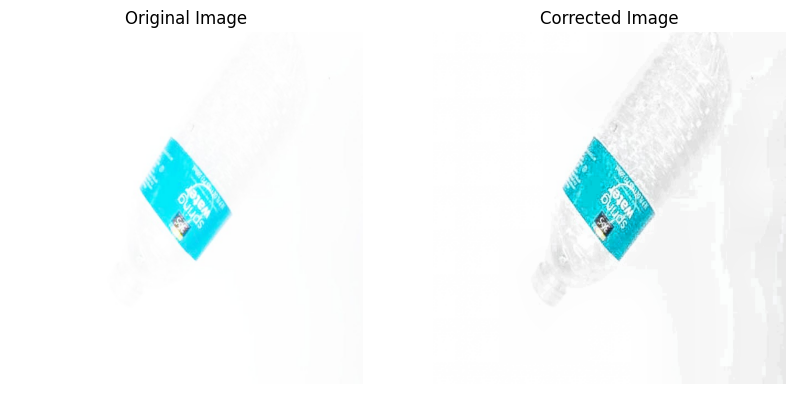


0: 640x640 1 plastic, 14.7ms
Speed: 6.7ms preprocess, 14.7ms inference, 354.6ms postprocess per image at shape (1, 3, 640, 640)


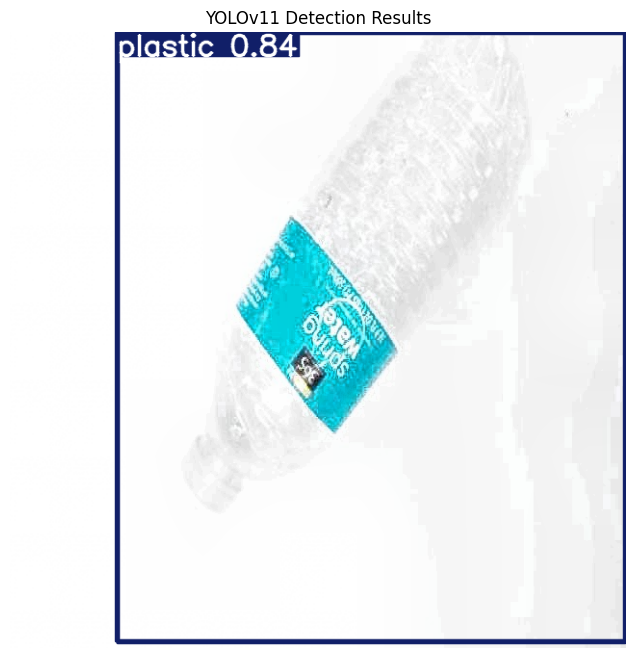

In [5]:
# Install necessary packages
# !pip install ultralytics scikit-image opencv-python matplotlib

# Import libraries
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define function to detect exposure levels (underexposed, overexposed, normal)
def detect_exposure_level(image, low_thresh=60, high_thresh=190):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    avg_brightness = np.mean(gray)
    if avg_brightness < low_thresh:
        return "underexposed"
    elif avg_brightness > high_thresh:
        return "overexposed"
    else:
        return "normal"

# # Function to apply adaptive correction based on exposure type
# def apply_adaptive_correction(image, exposure_level):
#     if exposure_level == "underexposed":
#         print("Detected exposure: underexposed - Applying Log-transform correction.")
#         c = 255 / np.log(1 + np.max(image))
#         corrected_image = c * (np.log(image.astype(np.float32) + 1))
#     elif exposure_level == "overexposed":
#         print("Detected exposure: overexposed - Applying Recursive RS-ESIHE correction.")
#         corrected_image = exposure.equalize_adapthist(image, clip_limit=0.02) * 255
#     else:
#         print("Detected exposure: normal - No correction applied.")
#         corrected_image = image.copy()

#     # Ensure image is in uint8 format
#     corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

#     # Resize to YOLO expected input size (640x640)
#     corrected_image = cv2.resize(corrected_image, (640, 640))

#     return corrected_image



# Log-transform correction function
def log_transform_correction(image):
    # Convert image to float and normalize
    image_float = image.astype(np.float32) / 255.0
    c = 1 / np.log(1 + np.max(image_float))
    corrected = c * np.log(1 + image_float)

    # Scale back to [0,255] and uint8
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)
    return corrected

# Recursive RS-ESIHE correction using Adaptive Histogram Equalization
def rs_esihe_correction(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    corrected_rgb = exposure.equalize_adapthist(image_rgb, clip_limit=0.02)
    corrected_rgb = (corrected_rgb * 255).astype(np.uint8)
    corrected_bgr = cv2.cvtColor(corrected_rgb, cv2.COLOR_RGB2BGR)
    return corrected_bgr

# Function to apply adaptive correction based on exposure type
def apply_adaptive_correction(image, exposure_level):
    if exposure_level == "underexposed":
        print("Detected exposure: underexposed - Applying Log-transform correction.")
        corrected_image = log_transform_correction(image)
    elif exposure_level == "overexposed":
        print("Detected exposure: overexposed - Applying Recursive RS-ESIHE correction.")
        corrected_image = rs_esihe_correction(image)
    else:
        print("Detected exposure: normal - No correction applied.")
        corrected_image = image.copy()

    return corrected_image



# Load YOLOv11 model (update path if necessary)
model = YOLO('/content/best.pt')

# Path to your input image (update path as necessary)
# input_image_path = '/content/000004-edited.jpg'

#metal
# input_image_path = '/content/AugTrashNet-4/test/images/metal52_jpg.rf.9d49d3dea2b6564504e0a8f9d3a22580.jpg'

#plastic
# input_image_path = '/content/AugTrashNet-4/test/images/plastic75_jpg.rf.fe4c3ce5343da9dd1bb62d6bb8eef0e2.jpg'
# input_image_path = '/content/plastic75_jpg.rf.fe4-dark.jpg'
input_image_path = '/content/plastic75_jpg.rf.fe4-white.jpg'


#paper
# input_image_path = '/content/AugTrashNet-4/test/images/paper134_jpg.rf.7a312584397952d30962a507a575981e.jpg'

#cardboard
# input_image_path = '/content/AugTrashNet-4/test/images/cardboard204_jpg.rf.48f6206e6d5c211ded82ba75eddc902e.jpg'


# Load original image
original_image = cv2.imread(input_image_path)

# Check if image loaded successfully
if original_image is None:
    raise FileNotFoundError(f"Could not load image from {input_image_path}")

# Detect image exposure level
exposure_level = detect_exposure_level(original_image)
print(f"Image exposure detected: {exposure_level}")

# Apply adaptive image correction
corrected_image = apply_adaptive_correction(original_image, exposure_level)

# Display original and corrected images
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Corrected image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title("Corrected Image")
plt.axis('off')

plt.show()

# Perform object detection with YOLOv11
results = model.predict(corrected_image, conf=0.5)

# Plot detection results
for result in results:
    img_with_detections = result.plot(line_width=3, font_size=16)

    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.title("YOLOv11 Detection Results")
    plt.axis('off')
    plt.show()


**Section with Histogram Visualization**

Exposure detected: Normal - No correction applied.


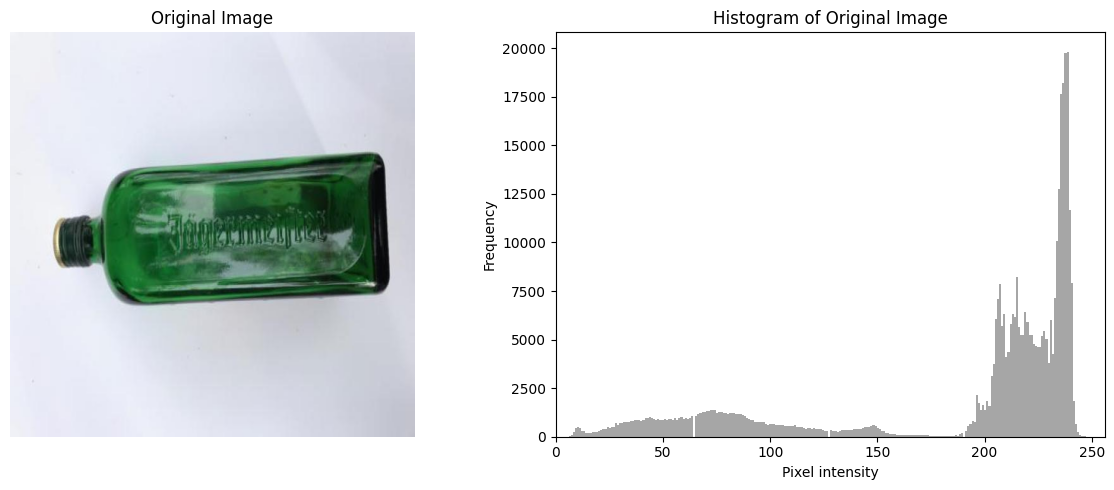

No correction was needed.

0: 640x640 1 glass, 14.9ms
Speed: 2.2ms preprocess, 14.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


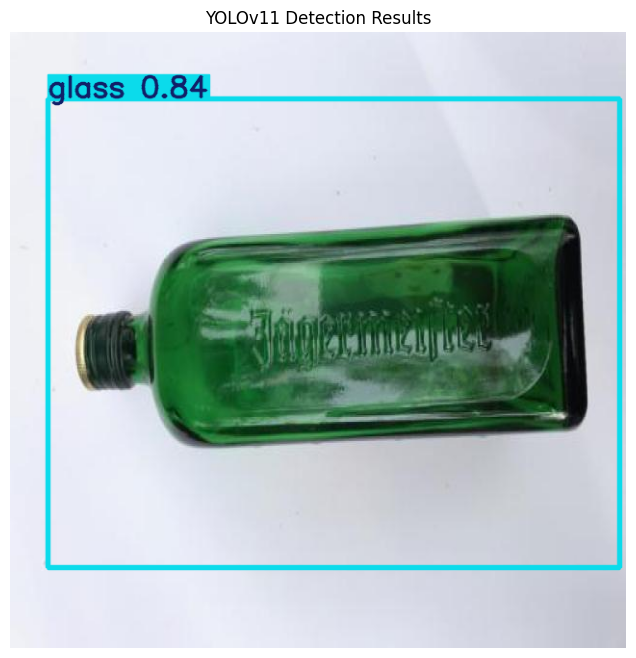

In [12]:
# Install packages if needed:
# !pip install ultralytics scikit-image opencv-python matplotlib

# Import required libraries
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Function to detect exposure level of an image
def detect_exposure_level(image, low_thresh=60, high_thresh=190):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    avg_brightness = np.mean(gray)
    if avg_brightness < low_thresh:
        return "underexposed"
    elif avg_brightness > high_thresh:
        return "overexposed"
    else:
        return "normal"

# Log-transform correction function for underexposed images
def log_transform_correction(image):
    image_float = image.astype(np.float32) / 255.0
    c = 1 / np.log(1 + np.max(image_float))
    corrected = c * np.log(1 + image_float)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)
    return corrected

# Recursive RS-ESIHE correction for overexposed images
def rs_esihe_correction(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    corrected_rgb = exposure.equalize_adapthist(image_rgb, clip_limit=0.02)
    corrected_rgb = (corrected_rgb * 255).astype(np.uint8)
    corrected_bgr = cv2.cvtColor(corrected_rgb, cv2.COLOR_RGB2BGR)
    return corrected_bgr

# Apply adaptive correction based on exposure level
def apply_adaptive_correction(image, exposure_level):
    if exposure_level == "underexposed":
        print("Exposure detected: Underexposed - Applying Log-transform correction.")
        corrected_image = log_transform_correction(image)
    elif exposure_level == "overexposed":
        print("Exposure detected: Overexposed - Applying Recursive RS-ESIHE correction.")
        corrected_image = rs_esihe_correction(image)
    else:
        print("Exposure detected: Normal - No correction applied.")
        corrected_image = image.copy()
    return corrected_image

# Plotting image alongside its histogram
def plot_image_and_histogram(image, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title(title)
    ax[0].axis('off')

    # Histogram
    ax[1].hist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).flatten(), bins=256, color='gray', alpha=0.7)
    ax[1].set_title(f'Histogram of {title}')
    ax[1].set_xlabel('Pixel intensity')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Load YOLOv11 model
model = YOLO('/content/best.pt')

# Input image path
# Recursive RS-ESIHE
# input_image_path = '/content/plastic75_jpg.rf.fe4-white.jpg'
# input_image_path = '/content/metal296_jpg.rf.f3-white.jpg'

# Log-transform
# input_image_path = '/content/plastic75_jpg.rf.fe4-dark.jpg'
# input_image_path = '/content/metal77_jpg.rf-dark.jpg'



#no correction
input_image_path = '/content/AugTrashNet-4/test/images/glass152_jpg.rf.2f2aa2079095e2367eea45fb4c38c8c6.jpg'
# input_image_path = '/content/AugTrashNet-4/test/images/metal52_jpg.rf.9d49d3dea2b6564504e0a8f9d3a22580.jpg'



# Load image
original_image = cv2.imread(input_image_path)
if original_image is None:
    raise FileNotFoundError(f"Could not load image from {input_image_path}")

# Detect exposure and correct the image
exposure_level = detect_exposure_level(original_image)
corrected_image = apply_adaptive_correction(original_image, exposure_level)

# Always display the original image and histogram
plot_image_and_histogram(original_image, 'Original Image')

# Display corrected image and histogram only if correction was applied
if exposure_level != "normal":
    plot_image_and_histogram(corrected_image, 'Corrected Image')
else:
    print("No correction was needed.")

# YOLOv11 prediction on the final image
results = model.predict(corrected_image, conf=0.5)

# Display detection results
for result in results:
    img_with_detections = result.plot(line_width=3, font_size=16)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.title("YOLOv11 Detection Results")
    plt.axis('off')
    plt.show()

